
# Project: Investigating Gun Permits and Sales in U.S.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this analysis I will be investigating the relationship between various variables and gun registration in this country. Some questions that I am posing include: Is there a relationship between handgun sales and long gun sales? What is the relation between regions of the US and gun ownership? I have selected Washington state and Alabama as two states to investigate. I live in Washington and it is a politicially liberal state, while I am to understand that Alabama is more conservative. One of the questions I have is, how do these two states compare on this topic. As I work with the data other questions may arise and I will keep remarks to explain the thought process behind each one.

In [2]:
#Imported the items I needed to complete the analysis. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> As I look at the data I am interested in the number of permits that have been distributed over time. I will reduce the number of columns so that it is easier to see the information. I have also replaced the null values in permits, handguns, and long guns with the mean value for each column. This is not the best way to fill in cells but it will serve the purpose of this investigation. Creating new dataframes for each state will make it easier to create visuals and compare various totals. I will also be comparing the state numbers with the national numbers.

### General Properties

In [3]:
#Reading the csv file into the program for analysis. df_gun is the dataframe for the gun and permit analysis.
#Printed the first five lines of the data frame to make sure the array looks correct.
df_gun = pd.read_csv('gun_data.csv')
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [51]:
#Looking to see the statistical values for the handgun and long_gun columns.
hand_gun = df_gun['handgun'].describe()
long_gun = df_gun['long_gun'].describe()
hand_gun, long_gun

(count     12485.000000
 mean       5940.879696
 std        8611.677589
 min           0.000000
 25%         868.000000
 50%        3067.000000
 75%        7277.000000
 max      107224.000000
 Name: handgun, dtype: float64, count     12485.000000
 mean       7810.846296
 std        9302.758891
 min           0.000000
 25%        2079.000000
 50%        5130.000000
 75%       10374.000000
 max      108058.000000
 Name: long_gun, dtype: float64)

In [5]:
#Using the shape function to find the number of columns and rows.
df_gun.shape

(12485, 27)

In [6]:
#The count function allows me to see the number of values in each column.
df_gun.count()

month                        12485
state                        12485
permit                       12461
permit_recheck                1100
handgun                      12465
long_gun                     12466
other                         5500
multiple                     12485
admin                        12462
prepawn_handgun              10542
prepawn_long_gun             10540
prepawn_other                 5115
redemption_handgun           10545
redemption_long_gun          10544
redemption_other              5115
returned_handgun              2200
returned_long_gun             2145
returned_other                1815
rentals_handgun                990
rentals_long_gun               825
private_sale_handgun          2750
private_sale_long_gun         2750
private_sale_other            2750
return_to_seller_handgun      2475
return_to_seller_long_gun     2750
return_to_seller_other        2255
totals                       12485
dtype: int64

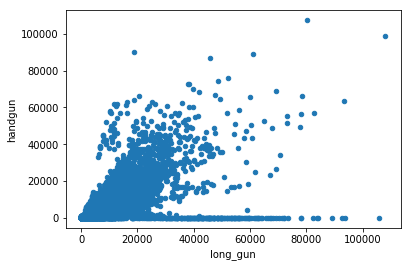

In [7]:
#Comparing the long_gun sales to the handgun sales across the U.S. using a scatter plot.
df_gun.plot(x='long_gun', y='handgun', kind='scatter');

I am looking at the national gun sales numbers comparing the long_gun sales to the handgun sales to see if a pattern appears. With this one glimpse it appears there is a correlation between the sales of long_guns and the sales of handguns. The correlation is not strong but it does seem to be a positive corrrelation. When more long guns are sold more handguns are sold as well.

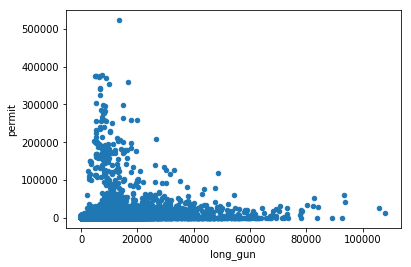

In [8]:
#Comparing the long_gun sales to the number of permits sold in the U.S.
df_gun.plot(x='long_gun', y='permit', kind='scatter');

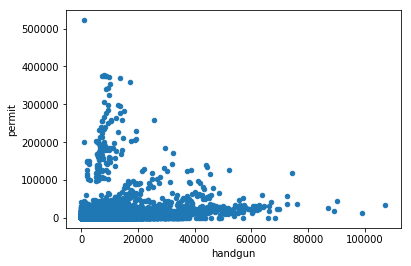

In [9]:
#Again comparing the handgun sales to the permit sales using a scatter plot.
df_gun.plot(x='handgun', y='permit', kind='scatter');

In [10]:
#Finding the mean for permits in the U.S.
permit_mean = df_gun['permit'].mean()
permit_mean

6413.6294037396674

In [11]:
#Finding the mean for handgun sales in the U.S.
handgun_mean = df_gun['handgun'].mean()
handgun_mean

5940.88110709988

In [53]:
#Findint the mean for the long gun sales in the U.S.
long_gun_mean = df_gun['long_gun'].mean()
long_gun_mean

7810.8462955546656

In [54]:
#I decided to find the totals for each of these categories in one cell. 
permit_tot = df_gun['permit'].sum()
handgun_tot = df_gun['handgun'].sum()
long_gun_tot = df_gun['long_gun'].sum()
permit_tot, handgun_tot, long_gun_tot

(80074148, 74171883, 97518416)

In [12]:
#Looking at the array again, this helped me decide what categories I needed and did not need for the analysis.
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In the previous section I looked as several statistics and totals for the dataframe for the guns in the U.S. It appears that there are fewer handguns being sold than there are permits, but that there are more long guns being sold than permits. This might be do to the fact that in order to buy a handgun and take it home that day you need to have a permit. This makes the background check go much faster. Rifles (long guns) on the other hand do not require a permit to take home that day.

In [16]:
#Wanted the total handgun sales again.
df_gun['handgun'].sum()

74171900.622141987

In [17]:
#Set up some variables for replacing the 'null' values with the mean of each category.
df_gun['handgun']= df_gun['handgun'].fillna(handgun_mean)
df_gun['permit']= df_gun['permit'].fillna(permit_mean)
df_gun.count()

month                        12485
state                        12485
permit                       12485
permit_recheck                1100
handgun                      12485
long_gun                     12466
other                         5500
multiple                     12485
admin                        12462
prepawn_handgun              10542
prepawn_long_gun             10540
prepawn_other                 5115
redemption_handgun           10545
redemption_long_gun          10544
redemption_other              5115
returned_handgun              2200
returned_long_gun             2145
returned_other                1815
rentals_handgun                990
rentals_long_gun               825
private_sale_handgun          2750
private_sale_long_gun         2750
private_sale_other            2750
return_to_seller_handgun      2475
return_to_seller_long_gun     2750
return_to_seller_other        2255
totals                       12485
dtype: int64

The new counts after I have filled in the null values with the means. This will make the comparisons later a bit easier. 

In [18]:
#Started dropping some of the columns that were not necessary for the analysis.
df_gun.drop(['admin', 'return_to_seller_handgun','return_to_seller_long_gun','return_to_seller_other'],axis=1, inplace=True)
df_gun.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,...,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,15.0,21.0,...,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,32019


In [19]:
#Continued to drop columns to tighty up the array.
df_gun.drop(['redemption_handgun','redemption_long_gun','returned_handgun','returned_long_gun','returned_other'], axis=1, inplace=True)
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,15.0,21.0,2.0,1.0,0.0,0.0,9.0,16.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,5.0,2.0,0.0,2.0,0.0,0.0,17.0,24.0,1.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,13.0,6.0,0.0,3.0,0.0,0.0,38.0,12.0,2.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,12.0,13.0,0.0,4.0,0.0,0.0,13.0,23.0,0.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,123506


> As I mentioned previously I have replaced the null values in the permits, handguns, and long_guns columns with the mean for that column. I have removed several columns that will not be necessary for this investigation. I will also look at the datatypes of the columns left. Some of the manipulation that needs to be done will require changing some of the datatypes. I have changed the datatypes for permit, handgun, and long gun to integers.

### Data Cleaning (Replace this with more specific notes!)

In [20]:
#Checking the datatypes so that I can evaluate which columns need to be converted. This will allow for easier manipulation.
df_gun.dtypes

month                     object
state                     object
permit                   float64
permit_recheck           float64
handgun                  float64
long_gun                 float64
other                    float64
multiple                   int64
prepawn_handgun          float64
prepawn_long_gun         float64
prepawn_other            float64
redemption_other         float64
rentals_handgun          float64
rentals_long_gun         float64
private_sale_handgun     float64
private_sale_long_gun    float64
private_sale_other       float64
totals                     int64
dtype: object

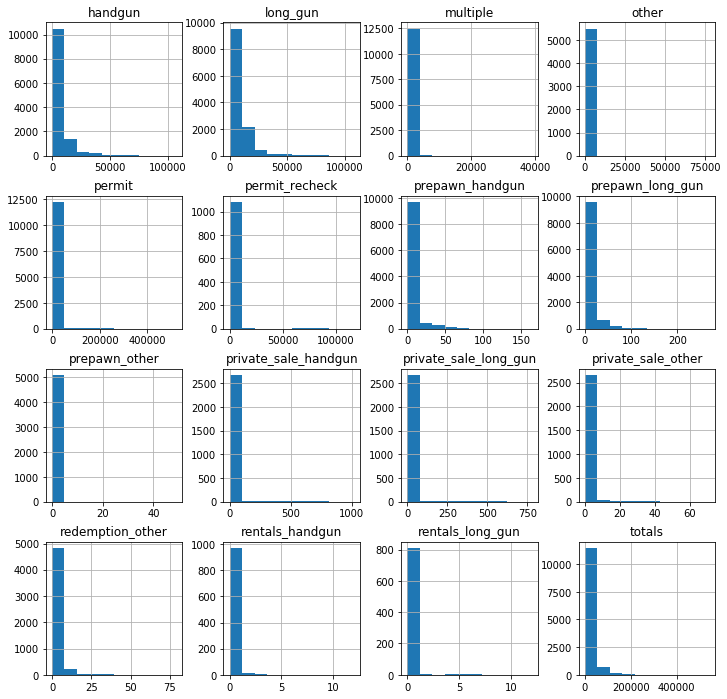

In [21]:
#Quick view of the data in a visual to get a feel for the distribution.
df_gun.hist(figsize=(12,12));

I like to run the hist feature on the data frame to get an overview of the information from a visual perspective. They all are skewed to the right. 

In [22]:
#Changing the datatype for the 'permit' column.
df_gun['permit']=df_gun.permit.astype(int)

In [23]:
#Changing the datatype for the 'handgun' column.
df_gun['handgun']=df_gun.handgun.astype(int)

I wanted all of the columns I would be looking at to be integer data types. This will make it simpler to calculate with the cell values and graph them for visuals.

In [24]:
#Setting a variable for the long_gun mean.
mean_long_gun = df_gun['long_gun'].mean()
mean_long_gun

7810.847585432376

In [57]:
#Filling the 'null' values in teh long_gun column.
df_gun['long_gun']= df_gun['long_gun'].fillna(mean_long_gun)

In [58]:
#Changing the datatype for the long gun column.
df_gun['long_gun']=df_gun.long_gun.astype(int)
df_gun.dtypes


month                     object
state                     object
permit                     int64
permit_recheck           float64
handgun                    int64
long_gun                   int64
other                    float64
multiple                   int64
prepawn_handgun          float64
prepawn_long_gun         float64
prepawn_other            float64
redemption_other         float64
rentals_handgun          float64
rentals_long_gun         float64
private_sale_handgun     float64
private_sale_long_gun    float64
private_sale_other       float64
totals                     int64
dtype: object

In [59]:
#Varifying the datatype for each of the columns had changed.
df_gun.dtypes

month                     object
state                     object
permit                     int64
permit_recheck           float64
handgun                    int64
long_gun                   int64
other                    float64
multiple                   int64
prepawn_handgun          float64
prepawn_long_gun         float64
prepawn_other            float64
redemption_other         float64
rentals_handgun          float64
rentals_long_gun         float64
private_sale_handgun     float64
private_sale_long_gun    float64
private_sale_other       float64
totals                     int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### How does the total number of permits distributed in Washington and Alabama compare to the number of handguns purchased in each state over the ten year period? My hypothesis is that Alabama will have more permits and guns than Washington since they are considered a more conservative state.

In [60]:
#Started to seperate the Washington data as a new dataframe.
df_wash = df_gun[df_gun['state'] == 'Washington']
df_wash.head()


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,totals
51,2017-09,Washington,11451,44.0,13292,11548,1623.0,587,12.0,11.0,0.0,7.0,0.0,0.0,701.0,590.0,42.0,43049
106,2017-08,Washington,12068,51.0,13788,9776,1529.0,623,1.0,6.0,0.0,4.0,0.0,0.0,760.0,628.0,29.0,42120
161,2017-07,Washington,10910,58.0,12872,8636,1503.0,565,5.0,6.0,1.0,2.0,0.0,0.0,708.0,502.0,36.0,38369
216,2017-06,Washington,12964,49.0,16674,9805,1694.0,604,6.0,10.0,2.0,3.0,0.0,0.0,763.0,574.0,33.0,46023
271,2017-05,Washington,14176,42.0,15915,9682,1617.0,584,8.0,5.0,2.0,5.0,0.0,0.0,722.0,500.0,24.0,45816


In [61]:
#Finding the mean of the permits distributed in Washington over the ten year period.
wa_per_mean = df_wash['permit'].mean()
wa_per_mean

7348.7180616740088

In [62]:
#Creating the dataframe for the Alabama gun data.
df_alab = df_gun[df_gun['state'] == 'Alabama']
df_alab.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,totals
0,2017-09,Alabama,16717,0.0,5734,6320,221.0,317,15.0,21.0,2.0,1.0,0.0,0.0,9.0,16.0,3.0,32019
55,2017-08,Alabama,19733,4.0,6289,6045,216.0,311,10.0,13.0,2.0,3.0,0.0,0.0,14.0,11.0,2.0,35038
110,2017-07,Alabama,18042,1.0,6046,4790,224.0,258,7.0,13.0,0.0,0.0,0.0,0.0,12.0,8.0,0.0,31474
165,2017-06,Alabama,19508,89.0,8275,4782,254.0,334,11.0,11.0,2.0,2.0,0.0,0.0,16.0,9.0,0.0,35687
220,2017-05,Alabama,18538,313.0,7198,4559,254.0,309,5.0,15.0,0.0,4.0,0.0,0.0,12.0,11.0,1.0,33331


I seperated the two states out of the national data frame for comparison. I have ran a couple statistical functions to get a feel for the data.

In [63]:
#Defining the variable for the mean for the Alabama permit sales.
alab_per_mean = df_alab['permit'].mean()
alab_per_mean

4614.277533039648

In [64]:
#Defining the variable for the U.S. permit total.
us_permit_total = df_gun['permit'].sum()
us_permit_total

80074148

In [65]:
#Defining the variable for the U.S. handgun total.
us_handgun_total = df_gun['handgun'].sum()
us_handgun_total

74171883

In [66]:
#Defining the variable for the Washington handgun total.
wash_handgun_tot = df_wash['handgun'].sum()
wash_handgun_tot

2025498

In [67]:
#Defining the variable for the Alabama handgun total.
alab_handgun_tot = df_alab['handgun'].sum()
alab_handgun_tot

2222037

In [68]:
#Defining the variable for the Washington permit total.
wash_permit_tot = df_wash['permit'].sum()
wash_permit_tot

1668159

In [69]:
#Defining the variable for the Alabama permit total.
alab_permit_tot = df_alab['permit'].sum()
alab_permit_tot

1047441

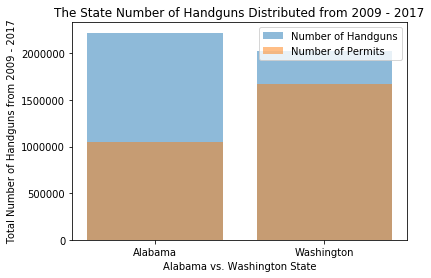

In [70]:
#Created ta bar graph for the hangun sales and the permit sales in each state. Displayed them on the same 
#chart so that a comparison would be easier.
plt.bar(['Washington','Alabama'],[wash_handgun_tot,alab_handgun_tot], alpha=.5, label='Number of Handguns')
plt.bar(['Washington','Alabama'],[wash_permit_tot,alab_permit_tot], alpha=.5, label = 'Number of Permits')
plt.ylabel('Total Number of Handguns from 2009 - 2017')
plt.xlabel('Alabama vs. Washington State')
plt.title('The State Number of Handguns Distributed from 2009 - 2017')
plt.legend();

This visual shows the comparison of permits sold to the number of handguns sold over the ten year period. It appears that there are more permits sold in Washington, but they sell fewer handguns.

In [71]:
#Calculated the ratio of handgun sales and the number of permits in each state and the U.S. Defined a variable for each.
us_perm_ratio = us_handgun_total/us_permit_total
wash_perm_ratio = wash_handgun_tot/wash_permit_tot
alab_perm_ratio = alab_handgun_tot/alab_permit_tot
us_perm_ratio, wash_perm_ratio, alab_perm_ratio

(0.92629000560830199, 1.2142115949378927, 2.1213958590507724)

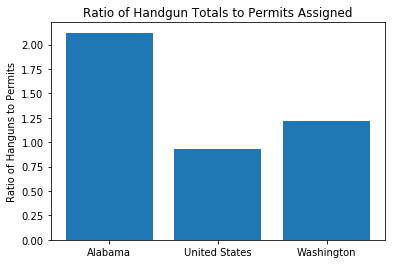

In [72]:
#Plotted the ratios for all three on a bar graph. This allows the viewer to see the relationship between the different 
#entities.
plt.bar(['Washington','Alabama','United States'],[wash_perm_ratio, alab_perm_ratio, us_perm_ratio])
plt.title('Ratio of Handgun Totals to Permits Assigned')
plt.ylabel('Ratio of Hanguns to Permits');

The findings are interesting, although Washington has more permits distributed, Alabama has more handguns. I realized that the number of handguns does not rely on the number of permits. A person could have one permit and several handguns. This could mean that gun owners in Alabama have multiple guns in their possession.

I decided to compare this to the national ratio of guns to permits. Alabama is still far exceeding the ratio of handguns to permits. The ratio says that on average every permit owner has at least two handguns. In Washington state and across the U.S. the ratio is closer to one handgun per permit.

### Research Question 2  - Is there a correlation between long gun sales and handgun sales? Do sales increases of long guns coincide with sales increases in handguns?

''

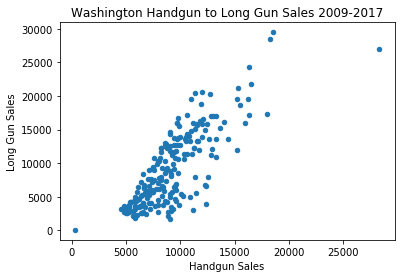

In [73]:
#This scatter plot is created to compare the long gun sales to the handgun sales in Washington. As you can see 
#there is a positive correlation.
df_wash.plot(x='long_gun', y='handgun', kind='scatter')
plt.title('Washington Handgun to Long Gun Sales 2009-2017')
plt.xlabel('Handgun Sales')
plt.ylabel('Long Gun Sales')
;

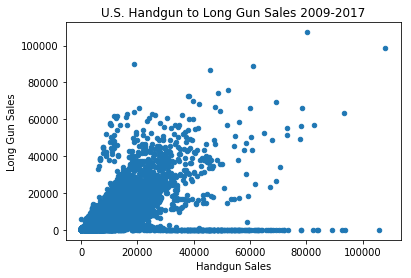

In [74]:
#This is the same scatter plot for the U.S. handgun sales vs. long gun sales.
df_gun.plot(x='long_gun', y='handgun', kind='scatter')
plt.title('U.S. Handgun to Long Gun Sales 2009-2017')
plt.xlabel('Handgun Sales')
plt.ylabel('Long Gun Sales');

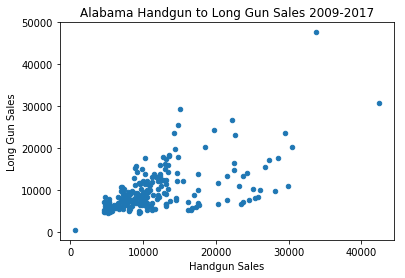

In [75]:
#The last scatter plot is representing Alabama's long gun vs. Handgun sales. 
df_alab.plot(x='long_gun', y='handgun', kind='scatter')
plt.title('Alabama Handgun to Long Gun Sales 2009-2017')
plt.xlabel('Handgun Sales')
plt.ylabel('Long Gun Sales');

In [76]:
#Calculating the standard deviation for the Washington long gun and handgun sales.
wa_lg_std = np.std(df_wash['long_gun'])
wa_hg_std = np.std(df_wash['handgun'])
wa_lg_std,wa_hg_std

(3201.8521021990355, 5622.6320786564529)

In [77]:
#Calculating the standard deviation for the Alabama long gun and handgun sales.
al_lg_std = np.std(df_alab['long_gun'])
al_hg_std = np.std(df_alab['handgun'])
al_lg_std,al_hg_std

(6321.7572784518843, 5357.0644917089166)

In [81]:
#These calculation are finding the percentage of national handgun sales for Washington and Alabama.
wash_perc_hg = wash_handgun_tot/handgun_tot
ala_perc_hg = alab_handgun_tot/handgun_tot
wash_perc_hg, ala_perc_hg

(0.027308164739460638, 0.02995794241869254)

In [47]:
#The statistical information for Washington.
df_wash.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,totals
count,227.000000,20.000000,227.000000,227.000000,100.000000,227.000000,192.000000,192.000000,93.000000,93.000000,18.0,15.0,50.000000,50.000000,50.000000,227.000000
mean,7348.718062,61.650000,8922.898678,9031.497797,1011.200000,379.744493,4.817708,6.901042,0.505376,2.978495,0.0,0.0,328.520000,264.560000,18.620000,28125.625551
std,7173.377039,59.771737,5635.057800,3208.928027,636.014516,193.143639,3.974144,6.462587,0.842146,2.963468,0.0,0.0,315.428781,245.464338,18.583392,15639.563438
min,1.000000,0.000000,65.000000,286.000000,17.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,361.000000
25%,3372.000000,7.250000,4240.500000,6644.500000,441.250000,243.000000,2.000000,3.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,16461.500000
50%,6085.000000,48.000000,7347.000000,8666.000000,884.000000,313.000000,4.000000,5.000000,0.000000,2.000000,0.0,0.0,297.500000,252.500000,16.500000,23879.000000
75%,9575.000000,102.750000,12794.500000,10627.000000,1425.000000,506.000000,6.000000,8.000000,1.000000,5.000000,0.0,0.0,573.250000,476.000000,30.750000,37351.500000
max,89199.000000,210.000000,29473.000000,28335.000000,2650.000000,986.000000,20.000000,49.000000,4.000000,17.000000,0.0,0.0,1017.000000,777.000000,71.000000,126000.000000


In [48]:
#The statistical information for Alabama.
df_alab.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,totals
count,227.000000,20.000000,227.000000,227.000000,100.000000,227.000000,192.000000,192.000000,93.000000,93.000000,18.000000,15.0,50.00000,50.000000,50.000000,227.000000
mean,4614.277533,37.450000,9788.709251,11568.409692,395.780000,463.568282,22.078125,33.036458,0.279570,4.473118,0.055556,0.0,4.48000,4.140000,0.380000,29542.198238
std,8629.991436,100.906666,5368.903323,6335.728030,268.012309,251.687365,18.079787,29.561077,0.614421,2.756776,0.235702,0.0,5.97013,5.595224,0.878078,16526.615233
min,0.000000,0.000000,449.000000,603.000000,10.000000,10.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,1062.000000
25%,0.000000,0.000000,6456.500000,7433.500000,176.000000,293.000000,9.000000,12.000000,0.000000,2.000000,0.000000,0.0,0.00000,0.000000,0.000000,18041.500000
50%,0.000000,0.000000,8101.000000,9837.000000,334.500000,379.000000,13.000000,17.000000,0.000000,4.000000,0.000000,0.0,0.00000,0.000000,0.000000,24123.000000
75%,675.500000,1.250000,11544.000000,13169.500000,538.750000,563.000000,35.250000,52.000000,0.000000,6.000000,0.000000,0.0,9.00000,8.000000,0.000000,38528.000000
max,31359.000000,340.000000,47605.000000,42433.000000,1698.000000,1752.000000,76.000000,132.000000,3.000000,11.000000,1.000000,0.0,17.00000,18.000000,4.000000,120914.000000


The standard deviations seem large, but we are talking about numbers in the tens of thousands. The standard deviation for the long gun is approximately 33% of the mean for Washington. The standard deviation for handguns in Washington is over 50% of the mean. This tells me that the data is pretty spread out and not close to the mean. There is a similar result in the Alabama data. When you compare the two columns, it does appear that there is a correlation (not causal) but a positive correlation between the two. 

<a id='conclusions'></a>
## Conclusions

> As I started this investigation, I was a little overwhelmed by the amount of data and the information provided. As I started to 'wrangle' it I began to see some insights that would be interesting to dig into. It appears that Washington has more permitted handgun owners than Alabama, but that Alabama has more handguns. Alabama had twice the ratio of handguns to permits than the national ratio. 

At this point I decided to look at the relationship between the long gun sales and the handgun sales in each state and across the country. I compared the two variables to each other and found a correlation between the two. It was not a strong correlation, but it does appear on a large scale that the more rifles (long guns) being sold the more handguns that are sold. 

Then I looked at the standard deviation between the two states and their respective sales. The deviations were significant meaning that the data was spread out relatively wildly. This would mean that you could not make any solid predictions with this information. Sales were not consistent month to month in either state. 

This was fascinating information and I enjoyed working with this data set. I would really like to look into the crime data for each state and determine if there is any significant finding there with relation to the gun violence and the number of firearms in each state. Also to determine if the number of permits decreased the violence in Washington vs. Alabama. 

Lastly, I was interested to see what percentage of the U.S. sales of handguns and long guns these two states represented. It appears that Washington represents about 2.7 percent of the national sales and Alabama represents approximately 3 percent of the total handgun sales in the U.S. 

This data was very clean, but there were some limitations. The number of months and the datatype for the months made it difficult to group the data by year or even month. Changing the datatype would have involved removing the "-" from the dates and replacing them with a "." Once I did this I could have changed the data type to "floating" and selected ranges of dates in a variable. There were many columns with null values. The columns I decided to use did not have as many so it was a relatively easy work around. If I would have wanted to use the other columns it would have been much more difficult to work through the "null" values.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [82]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0